In [1]:
# GHOST - Projection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

# curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation())

# test for setting up boundary conditions (not used for this projection)
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])

# discretization degree
p = 3

# volume and facet quadrature degrees
tau = 2*p + 1
mu = 2*p + 1

# solver parameters
params = {"project_title": "projection_test_2d",
         "problem": "projection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu}

# set up solver
projection_solver = Solver(params,mesh)

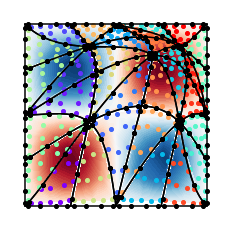

In [2]:
# run solver
projection_solver.run()
projection_solver.plot_numerical_solution()